In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_absolute_error as mae

## Load data
UCI adult dataset

In [3]:
# link = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours",
    "native",
    "class"
]

In [4]:
data = pd.read_csv("adult.csv", names=names)

In [5]:
data.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours,native,class
31922,55,Private,51008,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
26797,34,Private,203034,Bachelors,13,Separated,Sales,Not-in-family,White,Male,0,2824,50,United-States,>50K
21203,51,Private,99185,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K
24409,73,Self-emp-inc,191540,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K
13399,46,Local-gov,121370,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,30,United-States,<=50K


In [6]:
print(data.shape)

(32561, 15)


## detect class imbalance

<AxesSubplot:>

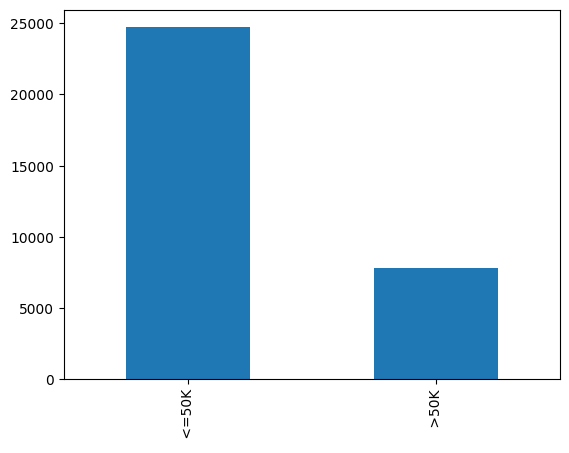

In [7]:
g = data[names[-1]].value_counts()
g.plot.bar()

In [8]:
types = data.dtypes
print(types)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours              int64
native            object
class             object
dtype: object


## detect NA values

In [9]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours             0
native            0
class             0
dtype: int64

## Encode categorical features into numerical ones 

In [10]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

for ft in names:
    if data[ft].dtype == "object":
        le.fit_transform(data[ft])
        data[ft] = le.transform(data[ft])

In [11]:
data.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours,native,class
20933,59,4,340591,0,6,2,6,0,4,1,3942,0,40,39,0
27629,55,6,170166,9,13,2,4,5,4,0,0,0,25,39,0
9099,21,4,109952,0,6,2,7,0,4,1,0,0,50,39,0


## X, y separation

In [12]:
X = data.values[:, :-1]
y = data.values[:, -1]
print(X.shape)
print(y.shape)

(32561, 14)
(32561,)


## Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
scaler.fit_transform(X)
X = scaler.transform(X)

In [15]:
X[0]

array([0.30136986, 0.875     , 0.0443019 , 0.6       , 0.8       ,
       0.66666667, 0.07142857, 0.2       , 1.        , 1.        ,
       0.02174022, 0.        , 0.39795918, 0.95121951])

# Modeling


## Train test split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [18]:
X_train.shape, X_test.shape

((26048, 14), (6513, 14))

## K-Nearest Neighbor

In [19]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
from sklearn.metrics import accuracy_score, classification_report

In [22]:
y_pred = knn.predict(X_test)
score = accuracy_score(y_pred=y_pred, y_true=y_test)
print(f"acc: {score*100:.2f} %")

acc: 82.50 %


In [23]:
mae(y_pred=y_pred, y_true=y_test)

0.17503454629203133

In [24]:
w_knn = KNeighborsClassifier(n_neighbors=5, weights="distance")
w_knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_pred = w_knn.predict(X_test)
score = accuracy_score(y_pred=y_pred, y_true=y_test)
print(f"acc: {score*100:.2f} %")

acc: 82.16 %


In [26]:
mae(y_pred=y_pred, y_true=y_test)


0.17841240595731614

In [27]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4893
           1       0.66      0.57      0.62      1620

    accuracy                           0.82      6513
   macro avg       0.76      0.74      0.75      6513
weighted avg       0.81      0.82      0.82      6513



## K-neighbor-regressor

In [28]:
knr = KNeighborsRegressor(n_neighbors=10)
knr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [29]:
y_pred_knr = knr.predict(X_test)
mae(y_pred_knr, y_test)

0.21598341777982497

In [30]:
w_knr = KNeighborsRegressor(n_neighbors=10)
w_knr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [31]:
y_pred_wknr = w_knr.predict(X_test)
mae(y_pred_wknr, y_test)

0.21598341777982497

In [32]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [33]:
dtc = DecisionTreeClassifier()
dtr = DecisionTreeRegressor()

dtc.fit(X_train, y_train)
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
y_pred_dtc = dtc.predict(X_test)
y_pred_dtr = dtr.predict(X_test)

In [35]:
print("DTC mae ",mae(y_pred=y_pred_dtc, y_true=y_test))
print("DTC accuracy ",accuracy_score(y_pred=y_pred_dtc, y_true=y_test))
print("DTR mae ",mae(y_pred=y_pred_dtr, y_true=y_test))

DTC mae  0.18977429755872868
DTC accuracy  0.8102257024412713
DTR mae  0.18877629356671272


In [36]:
rfc = RandomForestClassifier()
rfr = RandomForestRegressor()

rfc.fit(X_train, y_train)
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
y_pred_rfc = rfc.predict(X_test)
y_pred_rfr = rfr.predict(X_test)

In [38]:
print("RFC mae ",mae(y_pred=y_pred_rfc, y_true=y_test))
print("RFC accuracy ",accuracy_score(y_pred=y_pred_rfc, y_true=y_test))
print("RFR mae ",mae(y_pred=y_pred_rfr, y_true=y_test))

RFC mae  0.14616920006141562
RFC accuracy  0.8538307999385844
RFR mae  0.19231766503622794


# MLP

In [39]:
from keras.models import Sequential
from keras.layers import Dense

In [40]:
X_train.shape

(26048, 14)

In [57]:
mlp1 = Sequential([
    Dense(16,input_dim=X_train.shape[1], activation='relu', name='fc1'),
    Dense(16, activation='relu', name = "fc2"),
    # Dense(16, activation='relu', name = "fc3"),
    # Dense(8, activation='relu', name = "fc4"),
    Dense(8, activation='relu', name = "fc5"),
    Dense(1, name = "output")
])
mlp1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 16)                240       
                                                                 
 fc2 (Dense)                 (None, 16)                272       
                                                                 
 fc5 (Dense)                 (None, 8)                 136       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 657
Trainable params: 657
Non-trainable params: 0
_________________________________________________________________


In [58]:
mlp1.compile(
    optimizer='rmsprop',
    loss=['mse'],
    metrics=['mae']
)

In [59]:
history1 = mlp1.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=0)

In [60]:
def plot_history(history, metrics, model_name:str):
    fig = plt.figure(figsize=[8, 4])
    for metric in metrics:
        plt.plot(history.history[metric], label='train '+ metric)
        plt.plot(history.history['val_' + metric], label='val ' + metric)        
    plt.legend()    
    plt.xlabel('epoch')
    plt.ylabel(" ".join(metrics))
    plt.xticks(list(range(0, len(history.history[metrics[0]]), 2)))
    plt.grid(visible=True)
    plt.title(model_name + " training history [" + " ".join(metrics) + "]")

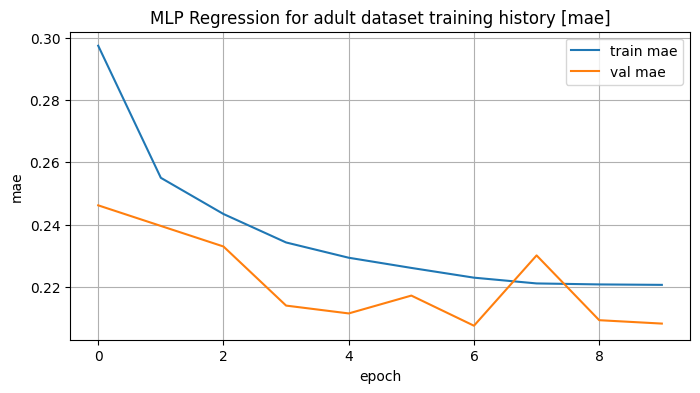

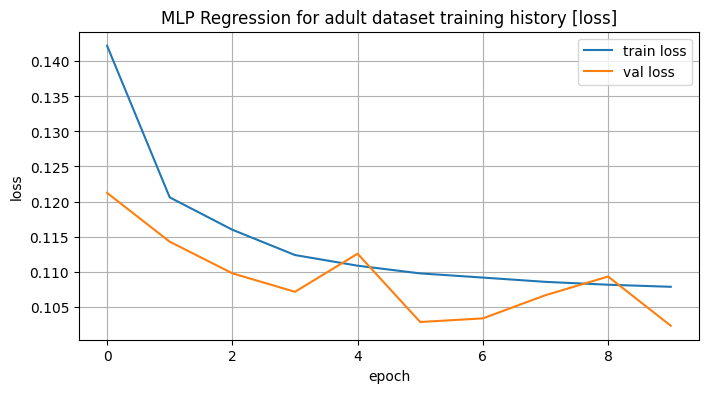

In [61]:
plot_history(history1, metrics=["mae"], model_name="MLP Regression for adult dataset")
plot_history(history1, metrics=["loss"],model_name="MLP Regression for adult dataset")

In [62]:
mlp1.evaluate(X_test, y_test)

204/204 [==============================] - 0s 2ms/step - loss: 0.1084 - mae: 0.2175


[0.10835190862417221, 0.21754612028598785]

### Classification MLP

In [47]:
mlp2 = Sequential([
    Dense(units=32, input_dim= X_train.shape[1], activation="relu", name="fc1"),
    Dense(units=16,activation="relu",name="fc2"),
    Dense(units=8, activation="relu",name="fc3"),
    Dense(units=8, activation="relu",name="fc4"),
    Dense(units=2, activation="softmax",name="output")
])
mlp2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 32)                480       
                                                                 
 fc2 (Dense)                 (None, 16)                528       
                                                                 
 fc3 (Dense)                 (None, 8)                 136       
                                                                 
 fc4 (Dense)                 (None, 8)                 72        
                                                                 
 output (Dense)              (None, 2)                 18        
                                                                 
Total params: 1,234
Trainable params: 1,234
Non-trainable params: 0
_________________________________________________________________


In [48]:
mlp2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [49]:
history2 = mlp2.fit(X_train, y_train, epochs=10, verbose=0, validation_split=0.2)

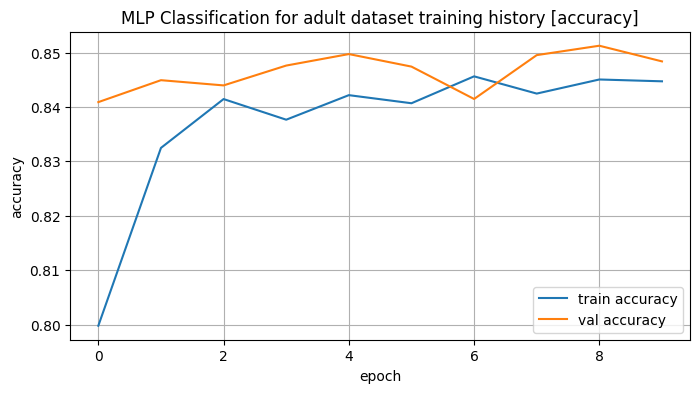

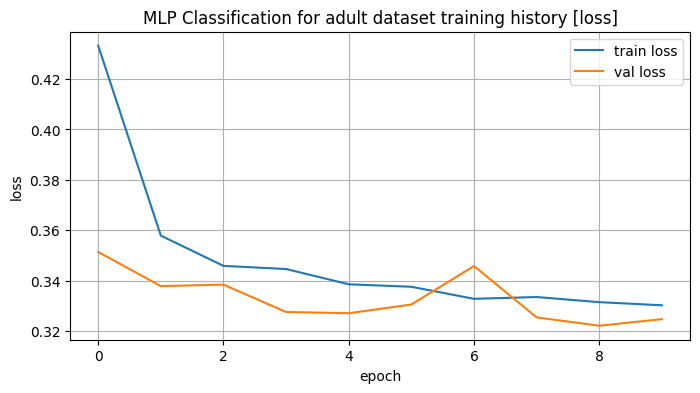

In [50]:
plot_history(history2, metrics=["accuracy"], model_name="MLP Classification for adult dataset")
plot_history(history2, metrics=["loss"],model_name="MLP Classification for adult dataset")

In [51]:
mlp2.evaluate(X_test, y_test)

204/204 [==============================] - 0s 1ms/step - loss: 0.3421 - accuracy: 0.8379


[0.34213578701019287, 0.8378627300262451]

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lgr =LogisticRegression()
lgr.fit(X_train, y_train)

LogisticRegression()

In [54]:
y_pred_lgr = lgr.predict(X_test)
mae(y_pred_lgr,y_test)

0.1833256563795486